#Chaper 2 데이터와 표본분포

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/New Hobby/데이터 과학을 위한 통계/practicalstatisticsfordatascientists/python
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

/content/drive/MyDrive/Colab Notebooks/New Hobby/데이터 과학을 위한 통계/practicalstatisticsfordatascientists/python


In [ ]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

#2.1 임의표본추출과 표본편향

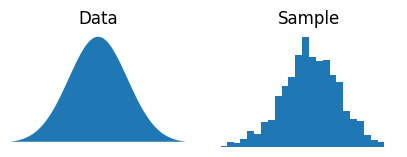

In [ ]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))


ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_title('Data')

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_title('Sample')
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

##용어정리
- 표본 : 더 큰 데이터 집합으로부터 얻은 부분집합
- 모집단 : 어떤 데이터 집합을 구성하는 전체 대상 혹은 전체 집합
- N : 모집단(표본)의 크기
- 임의표본추출(임의표집, 랜덤표본추출) : 무작위로 표본을 추출하는 것
- 층화표본추출(층화표집) : 모집단을 층으로 나눈 뒤, 각 층에서 무작위로 표본을 추출하는 것
- 계층 : 공통된 특징을 가진 모집단의 동종 하위 그룹
- 단순임의표본 : 모집단 층화 없이 임의표본추출로 얻은 표본
- 편향 : 계통 상의 오류
- 표본편향 : 모집단을 잘못 대표하는 표본

데이터 수집 과정에서 표본편향이 발생할 수 있다. 그 경우, 제대로 된 분석이 불가능하다.
이 때 핵심은 임의표본추출이다.

##주요개념
- 빅데이터 시대에도 임의표본추출은 데이터 과학자들의 화살통에 남은 중요한 화살이다.
- 편향은 측정이나 관측에 계통적 오차가 있어 전체 모집단을 제대로 대표하지 못할 경우에 발생한다.
- 데이터 품질이 데이터 양보다 중요할 때가 자주 있다. 임의표본추출은 편향을 줄이고, 나중에 다시 하려면 훨씬 비싼 값을 치룰 수도 있는 품질 향상을 용이하게 한다.

#2.2 선택편향

##용어정리
- 선택편향 : 관측 데이터를 선택하는 방식 때문에 생기는 현상
- 데이터 스누핑 : 뭔가 흥미로운 것을 찾아 광범위하게 데이터를 살피는 것
- 방대한 검색 효과 : 중복 데이터 모델링이나 너무 많은 예측 변수를 고려하는 모델링에서 비롯되는 편향 혹은 비재현성

* 평균으로의 회귀 : 어떤 변수를 연속적으로 측정했을 때, 예외적인 경우가 발생하면 그 다음에는 중간 정도의 경우가 관찰되는 경향.

(예외 경우를 너무 특별히 생각하고 의미 부여 시, 선택편향으로 이어질 수 있다.)


##주요개념
- 가설을 구체적으로 명시하고 임의표본추출 원칙에 따라 데이터를 수집하면 편향을 피할 수 있다.
- 모든 형태의 데이터 분석은 데이터 수집/분석 프로세스에서 생기는 편향의 위험성을 늘 갖고 있다.(데이터 마이닝에서의 모델 반복 실행, 연구 시 데이터 스누핑, 흥미로운 사건의 사후 선택 등)

#2.3 통계학에서의 표본 분포

##용어정리
- 표본통계량 : 더 큰 모집단에서 추출된 표본 데이터들로부터 얻은 측정지표
- 데이터 분포 : 어떤 데이터 집합에서의 각 개별 값의 도수분포
- 표본분포 : 여러 표본들 혹은 재표본들로부터 얻은 표본 통계량의 도수분포
- 중심극한정리 : 표본크기가 커질수록 표본분포가 정규분포를 따르는 현상
- 표준오차 : 여러 표본들로부터 표본통계량의 변량 (개별 데이터 값들의 변량을 뜻하는 표준편차와 혼동하지 말 것.)

In [ ]:
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')

         income  type
40292   63000.0  Data
38959   92000.0  Data
17361  134000.0  Data
33996   52000.0  Data
26491   43000.0  Data


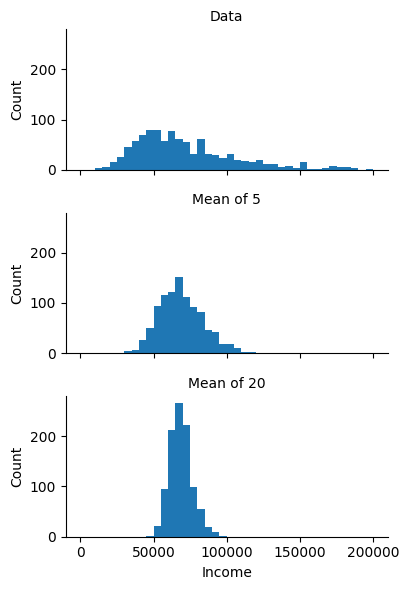

In [ ]:
sample_data = pd.DataFrame({
    'income' : loans_income.sample(1000),
    'type' : 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income' : [loans_income.sample(5).mean() for _ in range(1000)],
    'type' : 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income' : [loans_income.sample(20).mean() for _ in range(1000)],
    'type' : 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0,200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

n 제곱근의 법칙 : 표준오차와 표본 크기 사이의 관계에서, 표준오차가 표본크기의 제곱근에 반비례한다.


---


표준오차 = SE = $\frac{s}{\sqrt{n}}$

---

표준오차를 측정할 때 고려할 사항
1. 모집단에서 완전히 새로운 샘플들을 많이 수집한다.
2. 각각의 새 샘플에 대해 통계량을 계산한다.
3. 2단계에서 얻은 통계량의 표준편차를 계산한다. 이를 표준오차의 추정치로 사용한다.



##주요개념
- 표본통계량의 도수분포는 그 해당 지표가 표본마다 다르게 나타날 수 있음을 보여준다.
- 부트스트랩 방식 혹은 중심극한정리에 의존하는 공식을 통해 포본분포를 추정할 수 있다.
- 표준오차는 표본통계량의 변동성을 요약하는 주요 지표이다.

#2.4 부트스트랩

##용어정리
- 부트스트랩 : 현재 있는 표본에서 추가적으로 표본을 복원추출하고 각 표본에 대한 통계량과 모델을 다시 계산하는 것
- 부트스트랩 표본 : 관측데이터 집합으로부터 얻은 복원추출 표본
- 재표본추출(재표집, 리샘플링) : 관측 데이터로부터 반복해서 표본추출하는 과정. 부트스트랩과 순열(셔플링) 과정을 포함한다.

재표본추출 알고리즘
1. 샘플 값을 한 뽑아서 기록하고 다시 제자리에 놓는다.
2. n번 반복한다.
3. 재표본추출된 값의 평균을 기록한다.
4. 1~3단계를 R번 반복한다.
5. R개의 결과를 사용하여,
    * a. 표준편차(표본평균의 표준오차)를 계산한다.
    * b. 히스토그램 또는 상자그림을 그린다.
    * c. 신뢰구간을 찾는다.
* 단, R(부트스트랩 반복 횟수)은 임의로 설정한다. 반복횟수가 많을수록 표준오차나 신뢰구간에 대한 추정이 더 정확해진다.

In [ ]:
# Bootstrap
results = []
for nrepeat in range(1000):
  sample = resample(loans_income) #scikit-learn의 resample
  results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean()-loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -82.09799999999814
std. error: 228.73933106830927


주의 : 부트스트랩은 표본 크기가 작은 것을 보완하기 위한 것이 아니다. 새 데이터를 만드는 것도 아니며 기존 데이터 집합의 빈 곳을 채우는 것도 아니다.

모집단에서 추가적으로 표본을 뽑는다고 할 때 그 표본이 얼마나 원래 표본과 비슷할지를 알려줄 뿐이다.

##주요개념
- 부트스트랩(데이터로부터 복원추출)은 표본통계량의 변동성을 평가하는 강력한 도구이다.
- 부트스트랩은 표본분포의 수학적 근사치에 대한 엄청난 연구 없이도 다양한 환경에서 유사한 방식으로 적용될 수 있다.
- 또한 수학적 근사가 어려운 통계량에 대해서도 샘플링 분포를 추정할 수 있다.
- 예측 모델을 적용할 때, 여러 부트스트랩 표본들로부터 얻은 예측값을 모아서 결론을 만드는 것(배깅)이 단일 모델을 사용하는 것보다 좋다.

#2.5 신뢰구간

##용어정리
- 신뢰수준 : 같은 모집단으로부터 같은 방식으로 얻은, 관심 통계량을 포함할 것으로 예상되는, 신뢰구간의 백분율
- 구간끝점 : 신뢰구간의 최상위, 최하위 끝점

표본 크기 n과 관심 있는 표본통계량이 주어졌을 때, 부트스트랩 신뢰구간을 구하는 법
1. 데이터에서 복원추출 방식으로 크기 n인 표본을 뽑는다.(재표본추출)
2. 재표본추출한 표본에 대해 원하는 통계량을 기록한다.
3. 1~2단계를 R번 반복한다.
4. x% 신뢰구간을 구하기 위해, R개의 재표본 결과의 분포 양쪽 끝에서 $[\frac{(100-x)}{2}]$%만큼 잘라낸다.
5. 절단한 점들은 x% 부트스트랩 신뢰구간의 양 끝점이다.

68760.51844
55734.1


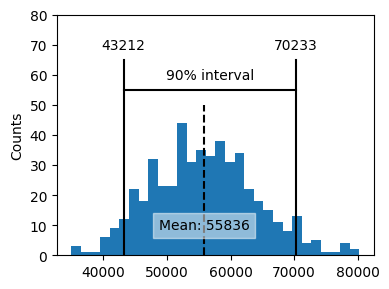

In [ ]:
# 20명 표본으로 구한 대출 신청자의 연간 소득에 대한 부트스트랩 신뢰구간
print(loans_income.mean())
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}',
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Note

표본 결과를 얻었을 때, '참값이 일정 구간 안에 있을 확률은 얼마인가?'에 대한 답이 신뢰구간이 되는 것은 아니다.

그러나 결국 대부분의 사람이 이 질문에 대한 대답을 설명하는 근거로 신뢰구간을 사용한다.


신뢰구간과 관련된 확률 문제는 '표본추출 절차와 모집단이 주어지면 ~할 확률은 얼마인가?'라는 문구로 시작된다. 반대로 '표본 결과가 주어졌을 때, (모집단에 대해 어떤 것이 참일) 확률은 무엇인가?'라는 질문은 더 복잡한 계산과 불확실한 요소를 필요로 한다.

Note

데이터 과학자는 신뢰구간을 통해 표본 결과가 얼마나 달라질 수 있는지 알 수 있다. 데이터 과학자들이 학술 논문을 발표하거나 규제 기관에 결과를 보고하는 데, 이런 정보들을 사용하지 않을 것이다. 대신, 추정에 대한 잠재적인 오류를 알려주거나, 더 큰 표본에 필요한지 여부를 파악하는 용도로 이것들을 사용할 것이다.

##주요개념
- 신뢰구간은 구간 범위로 추정값을 표시하는 일반적인 방법이다.
- 더 많은 데이터를 보유할수록 표본추정치의 변이가 줄어든다.
- 허용할 수 있는 신뢰수준이 낮을수록 신뢰구간은 좁아진다.
- 부트스트랩은 신뢰구간을 구성하는 효과적인 방법이다.

#2.6 정규분포

##용어정리
- 오차 : 데이터 포인트와 예측값 혹은 평균 사이의 차이
- 표준화(정규화) : 평균을 빼고 표준편차로 나눈다.
- z 점수 : 개별 데이터 포인트를 정규화한 결과
- 표준정규분포 : 평균이 0이고 표준편차가 1인 정규분포
- QQ그림 : 표본분포가 특정 분포에 얼마나 가까운지를 보여주는 그림

Text(0, 0.5, 'Counts')

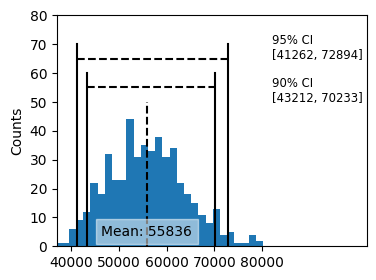

In [ ]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50,
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65,
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

정규분포에서 데이터의 68%는 평균의 표준편차 내에 속하며(1$\sigma$), 95%는 표준편차 두 배수 내에 있다(2$\sigma$).

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

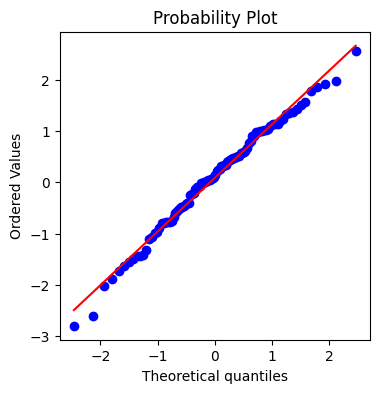

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

##주요개념
- 정규분포는 불확실성과 변동성에 관한 수학적 근사가 가능하도록 했다. 이는 통계의 역사적 발전에 필수적이었다.
- 원시 데이터 자체는 대개 정규분포가 아니지만, 표본들의 평균과 합계, 그리고 오차는 많은 경우 정규분포를 따른다.
- 데이터를 z 점수로 변환하려면 데이터의 값에서 평균을 빼고 표준편차로 나눈다. 그러면 데이터를 정규분포와 비교할 수 있다.

#2.7 긴 꼬리 분포

##용어정리
- 꼬리 : 적은 수의 극단값이 주로 존재하는, 도수분포의 길고 좁은 부분
- 왜도 : 분포의 한쪽 꼬리가 반대쪽 다른 꼬리보다 긴 정도

In [ ]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

'\n정규분포를 따르지 않는 것을 확인할 수 있다.\n'

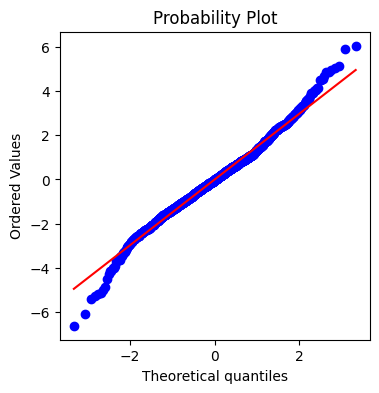

In [ ]:
# 넷플릭스의 일일 주식 수익률에 대한 QQ그림
nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(nflx, plot=ax)

'''
정규분포를 따르지 않는 것을 확인할 수 있다.
'''

* 푸아송 분포는 '시간 주기별 이벤트'를 모델링하는 데 가장 적합한 분포

##주요개념
- 대부분의 데이터는 정규분포를 따르지 않는다.
- 정규분포를 따를 것이라는 가정은, 자주 일어나지 않는 예외 경우('흑고니')에 관한 과소평가를 가져올 수 있다.
- 흑고니 이론 : 이례적인 사건이, 정규분포로 예측되는 것보다 훨씬 더 자주 일어날 수 있다고 예측하는 이론.

#2.8 스튜던트의 t 분포

t 분포는 정규분포와 생김새가 비슷하지만, 꼬리 부분이 약간 더 두껍고 길다.

t 분포는 표본 통계량의 분포를 설명하는 데 광범위하게 사용된다.

표본평균의 분포는 일반적으로 t 분포와 같은 모양이며, 표번 크기에 따라 다른 계열의 t 분포가 있다.

표본이 클수록 더 정규분포르 닮은 t 분포가 형성된다.

##용어정리
- n : 표본크기
- 자유도 : 다른 표본크기, 통계량, 그룹의 수에 따라 t 분포를 조절하는 변수

스튜던트 t 분포 : '더 큰 모집단에서 추출한 표본평균의 표본분포는 무엇인가?'

t 분포와 비교한 표본평균 주위의 90%의 신뢰구간

: $ \overline{x} \pm  t_{n-1}(0.05)  \bullet  \frac{s}{ \sqrt{n}} $

($t_{n-1} (0.05)$ : (n-1)의 자유도를 갖는 t 분포의 양 끝에서 5%만큼을 잘라내는 t 통계량을 의미한다.

##주요개념
- t 분포는 정규분포와 비슷한데 꼬리만 조금 더 두꺼운 형태이다.
- t 분포는 표본평균, 두 표본평균 사이의 차이, 회귀 파라미터 등의 분포를 위한 기준으로 널리 사용된다.

#2.9 이항분포

##용어정리
- 시행 : 독립된 결과를 가져오는 하나의 사건
- 성공 : 시행에 대한 관심의 결과
- 이항식 : 두 가지 결과를 갖는다.
- 이항시행 : 두 가지 결과를 가져오는 시행
- 이항분포 : n번 시행에서 성공한 횟수에 대한 분포

In [ ]:
print(stats.binom.pmf(2, n=5, p=0.1))
print(stats.binom.cdf(2, n=5, p=0.1))

0.07289999999999992
0.99144


이항 분포의 평균 : n * p
이항 분포의 분산 : n * p * (1-p)

##주요개념
- 이항 결과는 무엇보다도 중요한 결정 사항들을 나타내는 모델을 만드는 데 매우 중요하다.
- 이항시행은 두 가지 결과, 즉 하나는 확률 p, 다른 하나는 확률 (1-p)인 실험을 말한다.
- n이 크고 p가 0 또는 1에 너무 가깝지 않은 경우, 이항분포는 정규분포로 근사할 수 있다.

#2.10 카이제곱분포

##주요개념
- 카이제곱분포는 일반적으로 범주에 속하는 주제 또는 항목의 수와 관련이 있다.
- 카이제곱통계는 귀무 모델의 기댓값에서 벗어난 정도를 측정한다.

$f(x;\,k)={\frac  {1}{2^{{k/2}}\Gamma (k/2)}}\,x^{{k/2-1}}e^{{-x/2}}\,{\mathbf  {1}}_{{\{x\geq 0\}}}$

#2.11 F 분포

##주요개념
- F 분포는 측정된 데이터와 관련한 실험 및 선형 모델에 사용된다.
- F 통계량은 관심 요인으로 인한 변동성과 전체 변동성을 비교한다.

#2.12 푸아송 분포와 그 외 관련 분포들

##용어정리
- 람다 : 단위 시간이나 단위 면적당 발생하는 비율
- 푸아송 분포 : 표집된 단위 시간 혹은 단위 공간에서 발생한 사건의 도수분포
- 지수분포 : 한 시간에서 그 다음 시건까지의 시간이나 거리에 대한 도수분포
- 베이불 분포 : 사건 발생률이 시간에 따라 변화하는, 지수분포의 일반화된 버전

In [ ]:
# 푸아송 분포
sample = stats.poisson.rvs(2, size=10000) # lambda = 2 인 푸아송 분포에서 난수 100개를 생성하는 코드

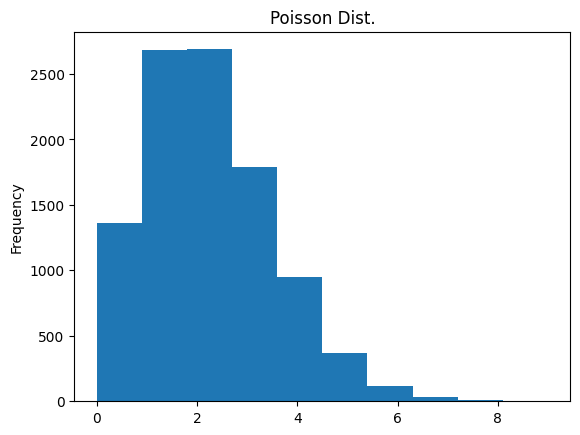

In [ ]:
plt.title('Poisson Dist.')
pd.Series(sample).plot.hist()
plt.show()

In [ ]:
# 지수분포
sample = stats.expon.rvs(scale=1/0.2, size=10000)

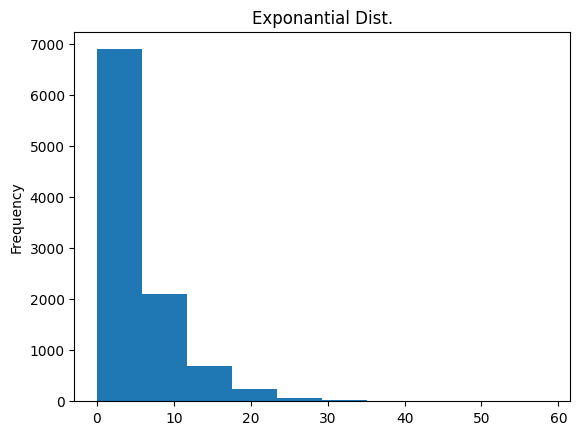

In [ ]:
plt.title('Exponantial Dist.')
pd.Series(sample).plot.hist()
plt.show()

In [ ]:
# 베이불 분포
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100000)

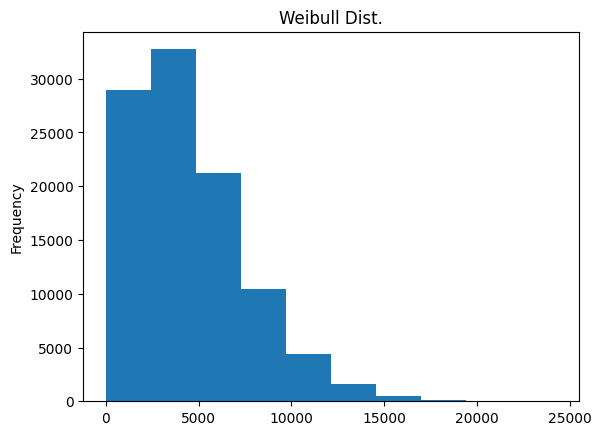

In [ ]:
plt.title('Weibull Dist.')
pd.Series(sample).plot.hist()
plt.show()